In [2]:
#!/usr/bin/env python
# coding: utf-8

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pyproj import Proj
import os, shutil
import numpy as np
import xarray as xr
from itertools import chain

def plot_basemap(llcrnrlon,llcrnrlat,urcrnrlon,urcrnrlat,ax,lat_0,lon_0,ny,nx):

    m = Basemap(llcrnrlon,llcrnrlat,urcrnrlon,urcrnrlat,resolution='l',projection='cyl', ax=ax)   
#     m = Basemap(llcrnrlon,llcrnrlat,urcrnrlon,urcrnrlat,resolution='l',projection='tmerc', ax=ax,lat_0=lat_0,lon_0=lon_0)

#     m.drawmapboundary(color='grey', linewidth=1.5)
    m.drawstates(linewidth=1, linestyle='solid', color='grey')
    m.drawcountries(linewidth=1, linestyle='solid', color='k')
    m.drawcoastlines(linewidth=.75, linestyle='solid', color='k')
#     m.drawrivers(linewidth=0.5, linestyle='solid', color='blue')
   
#     # lat and lon with lables
#     m.drawparallels(np.arange(np.floor(llcrnrlat),np.ceil(urcrnrlat),2),labels=[True,False,False,False],dashes=[1,1], fontsize='small') # Draw parallels (latitude lines) for values (in degrees).
#     m.drawmeridians(np.arange(np.floor(llcrnrlon),np.ceil(urcrnrlon),5),labels=[False,False,False,True],dashes=[1,1], fontsize='small') # Draw meridians (longitude lines). Label [left, right, top, bottom]
    
#     # draw a shaded-relief image
#     m.shadedrelief(scale=0.5)
    
#     # lats and longs are returned as a dictionary
# #     lats = m.drawparallels(np.arange(llcrnrlat,urcrnrlat,dy),labels=[False,False,False,False],dashes=[0.5,0.5]) 
# #     lons = m.drawmeridians(np.arange(llcrnrlon,urcrnrlon,dx),labels=[False,False,False,False],dashes=[0.5,0.5]) 
#     lats = m.drawparallels(np.reshape(np.linspace(llcrnrlat,urcrnrlat,ny+1),(ny+1,)),labels=[False,False,False,False],dashes=[0.5,0.5]) 
#     lons = m.drawmeridians(np.reshape(np.linspace(llcrnrlon,urcrnrlon,nx+1),(nx+1,)),labels=[False,False,False,False],dashes=[0.5,0.5]) 

#     lat_lines = chain(*(tup[1][0] for tup in lats.items()))
#     lon_lines = chain(*(tup[1][0] for tup in lons.items()))
#     all_lines = chain(lat_lines, lon_lines)
    
#     # cycle through these lines and set the desired style
#     for line in all_lines:
#         line.set(linestyle='-', alpha=0.3, color='grey')

    return m

# ===============================================================================
root_dir = '/glade/u/home/hongli/scratch/2020_04_21nldas_gmet/scripts'
grid_info_file = 'conus_ens_grid_eighth_deg_v1p1.nc'

outfolder = 'step1_sample_stnlist'
if os.path.exists(os.path.join(root_dir, outfolder)):
    shutil.rmtree(os.path.join(root_dir, outfolder))
os.makedirs(os.path.join(root_dir, outfolder))
ofile_name_base = 'stnlist'
dpi_value = 90

# ==========================================================================================
# read grid info
f = xr.open_dataset(os.path.join(root_dir,grid_info_file))
mask = f['mask'].values[:] # 1 is valid. 0 is invalid. 
latitude = f['latitude'].values[:] 
longitude = f['longitude'].values[:] 
elev = f['elev'].values[:] 
gradient_n_s = f['gradient_n_s'].values[:] 
gradient_w_e = f['gradient_w_e'].values[:] 

(ny,nx)=np.shape(mask)
(y_ids,x_ids)=np.where(mask==1)
total_stn_num = len(y_ids)

# sampled grid interval
index_intervals=[2,3,4,5,6,7,8,9,10] #1/4, 1/9, 1/16, 1/25,...,1/100  
# index_intervals=[4,5] #1/4, 1/9, 1/16, 1/25  

# # ==========================================================================================
# # uniformly sample and save
# print('save stnlist.txt')
# choice_num_previous = 0
# # for index_interval in index_intervals:    
# for index_interval in index_intervals:    
    
#     choice_index = np.where((y_ids%index_interval==0) & (x_ids%index_interval==0))[0]
#     choice_num = len(choice_index)
    
#     if choice_num!=choice_num_previous:
#         print('index interval = '+str(index_interval)+', choice num = '+str(choice_num))

# #         ofile = ofile_name_base + '_'+str('%05d' %(choice_num))+'grids.txt'
#         ofile = ofile_name_base +'_'+str('%05d' %(choice_num))+'grids'+ '_interval'+str(index_interval)+'.txt'
#         f_out = open(os.path.join(root_dir, outfolder, ofile), 'w') 
#         f_out.write('NSITES\t'+str(choice_num)+'\n') # total number line
#         f_out.write('STA_ID LAT LON ELEV SLP_N SLP_E STA_NAME\n') # title line
#         for i in range(choice_num):
#             choice_row = y_ids[choice_index[i]]
#             choice_col = x_ids[choice_index[i]]
            
#             sta_id = 'Row'+str('%03d' %(choice_row))+'Col'+str('%03d' %(choice_col))
#             lat_i=latitude[choice_row,choice_col]
#             lon_i=longitude[choice_row,choice_col]
#             ele_i=elev[choice_row,choice_col]
#             gradient_n_s_i=gradient_n_s[choice_row,choice_col]
#             gradient_w_e_i=gradient_w_e[choice_row,choice_col]
#             stn_name = '"'+sta_id+'"'
#             f_out.write('%s, %f, %f, %f, %f, %f, %s\n' \
#                         % (sta_id, lat_i, lon_i, ele_i, gradient_n_s_i, gradient_w_e_i, stn_name)) 
#         f_out.close()
#         choice_num_previous=choice_num        

# # ==========================================================================================
# print('plot distribution')
# llcrnrlon=longitude[0,0]-1
# llcrnrlat=latitude[0,0]-1
# urcrnrlon=longitude[-1,-1]+1
# urcrnrlat=latitude[-1,-1]+1

# lat_0=0.5*(llcrnrlat+urcrnrlat)
# lon_0=0.5*(llcrnrlon+urcrnrlon)

# stnlist_files = [f for f in os.listdir(os.path.join(root_dir, outfolder)) if ofile_name_base in f]
# stnlist_files = sorted(stnlist_files)

# # plot
# ncol = 3
# nrow = int(np.ceil(len(stnlist_files)/ncol))

# fig, ax = plt.subplots(nrow, ncol)
# fig.set_figwidth(4.5*ncol) 
# fig.set_figheight(4.5*0.75*nrow)

# for i in range(nrow):
#     for j in range(ncol):

#         k = i*ncol+j            
#         if k<len(stnlist_files):  

#             # read sampled stnlist.txt
#             stnlist_file = os.path.join(root_dir, outfolder, stnlist_files[k])
#             interval = int(stnlist_files[k].split('.')[0].split('_')[2].split('interval')[1])
#             data = np.loadtxt(stnlist_file, skiprows=2, usecols=[1,2],delimiter=',') #STA_ID[0], LAT[1], LON[2], ELEV[3], SLP_N[4], SLP_E[5], STA_NAME[6]
#             stn_num = len(data)
#             stn_lons = [float(data[i][1]) for i in range(stn_num)]
#             stn_lats = [float(data[i][0]) for i in range(stn_num)]
#             print(str(stn_num) +' Grids')

#             m = plot_basemap(llcrnrlon,llcrnrlat,urcrnrlon,urcrnrlat,ax[i,j],lat_0,lon_0,ny,nx) # plot Basemap 

#             x, y = m(stn_lons,stn_lats) # convert the lat/lon values to x/y projections.
#             m.plot(x, y, 'bs', markersize=0.5) # plot sampeld grid points

#             # set title
#             ratio=str('1/')+str(interval**2)
#             perctl=round(stn_num/total_stn_num*100,2)
#             title_str = '('+chr(ord('a') + k) +') ' + str(stn_num)  +' samples ('+str(perctl)+'%, interval = '+str(interval)+')'
#             ax[i,j].set_title(title_str, fontsize='small', fontweight='semibold')

#         else: # blank axis
#             ax[i,j].axis('off')

# # save plot
# fig.tight_layout()
# ofile = 'sample_grids_dist.png'
# fig.savefig(os.path.join(root_dir, outfolder, ofile), dpi=dpi_value)
# plt.close(fig)    

print('Done')


Done


In [17]:
np.nanmin(gradient_n_s),np.nanmax(gradient_n_s),np.nanmin(gradient_w_e),np.nanmax(gradient_w_e),np.nanmin(elev),np.nanmax(elev)

(-22.63213271781933,
 20.190608591325486,
 -42.17094759045168,
 44.35423107133694,
 -71.0,
 3699.562)

In [14]:
np.where(gradient_n_s==5.8113)
gradient_n_s[-1,1]

4.606678846284801

In [6]:
np.savetxt('gradient_n_s.txt',gradient_n_s,delimiter=',',fmt='%.2f')
print('Done')

Done


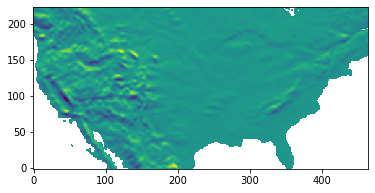

In [8]:
import matplotlib.pyplot as plt
plt.imshow(gradient_n_s, origin='lower')


In [10]:
choice_index[0]

array([    3,     7,    11, ..., 79467, 79471, 79475])